Step for learning linear regression: 

Step 1: Getting and setting up the data.

Step 2: Visualizing current data.

Step 3: The mathematics behind the Least Squares Method.

Step 4: Using Numpy for a Univariate Linear Regression.

Step 5: Getting the error.

Step 6: Using scikit learn to implement a multivariate regression.

Step 7: Using Training and Validation.  

Step 8: Predicting Prices

Step 9 : Residual Plots

### Step 1: Getting and setting up the data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#import dataset dengan menggunakan skicitlearn
from sklearn.datasets import load_boston

In [4]:
#loading the dataset
boston = load_boston()

In [5]:
#see what the dataset contains
#method DESCR merupakan method spesial untuk melihat deskripsi
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# Mau melakukan command di bawah tapi gabisa
# Artinya boston bukan DataFrame ataupun Series
# boston.head()

### Step 2: Visualizing current data

Text(0, 0.5, 'Number of houses')

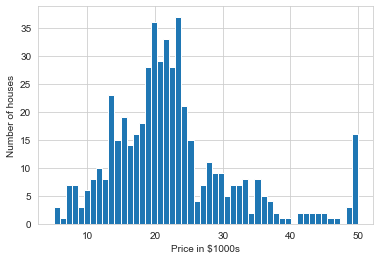

In [7]:
#wtf is a target? 
#price is the current target or label in our dataset
plt.hist(boston.target, bins=50)

plt.xlabel('Price in $1000s')
plt.ylabel('Number of houses')

Price in 1000 maksudnya dalam 1000 dollar. Berarti kalau di angka 50, artinya 50 x 1000 = 50.000

Menggunakan scatter plot untuk membandingkan jumlah kamar dengan harga 1000$

Text(0.5, 0, 'Number of rooms')

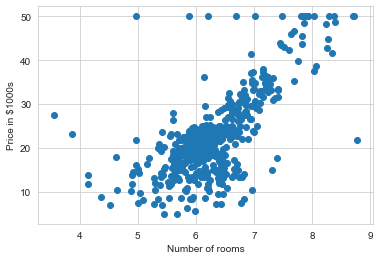

In [8]:
#plot the column at the index 5, yang merupakan room (RM)
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Price in $1000s')
plt.xlabel('Number of rooms')

Harga meningkat seiring dengan meningkatnya jumlah ruangan. Make sense

Fit the data linearly to using skicit.learn

1.) Use pandas to transform the boston dataset into a DataFrame: 

2.) Then use seaborn to perform an lmplot on that DataFrame to reproduce the scatter plot with a linear fit line.

In [9]:
#buat data menjadi dataframe
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
#add the target to  our dataset, the price
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


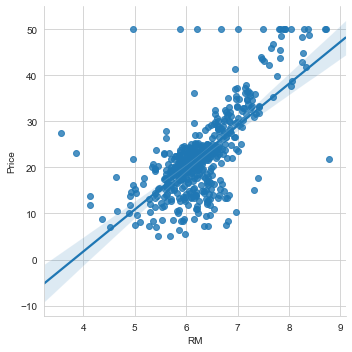

In [12]:
#menggunakan lmplot untuk membuat linear fit 
sns.lmplot('RM', 'Price', data=boston_df)

Kita tidak bisa menggunakan ini jika model menjadi lebih complicated, oleh karenanya kita tetap menggunakan skicit

### Step 3: The mathematics behind the least square methods

Least Square Method di sini digunakan untuk menghitung koefisien. 

Selengkapnya: https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb

### Step 4: Using Numpy for Univariate Linear Regression

Numpy has built-in Least Square Method in his linear algebra library. Kita akan menggunakan ini dulu sebelum berpindah ke skicit learn untuk Multivariate Linear Regression

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: Numpy expects a two-dimensional array, the first dimension is the different example values, and the second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using numpy's built-in vertical stack tool, vstack.

In [13]:
X = boston_df.RM

X=np.vstack([boston_df.RM,np.ones(len(boston_df.RM))]).T

Y = boston_df.Price

In [14]:
X = boston_df.RM

In [15]:
#shapenya dan cuma satu dimensi
X.shape

(506,)

In [16]:
#Berbentuk Series
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

Hanya menampilkan Series

In [17]:
#Ubah shapenya menjadi dua dimensi
X=np.vstack(boston_df.RM)

In [18]:
#Bentuknya setiap nilai X adalah matrix/list
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [19]:
#Cara di Udemy tidak bisa. Akhirnya memakai cara di comment
#Akan tetapi jadi tidak begitu mengerti 
X.shape

(506, 1)

In [20]:
#membuat X menjadi X, 1
X = np.array( [ [value,1] for value in X ] )

In [21]:
#Memiliki nilai 1 di belakangnya
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [22]:
#astype berarti mengubah type
X = X.astype(float)

In [23]:
#untuk mendapatkan nilai least square 
m, b = np.linalg.lstsq(X, Y)[0]

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [24]:
#hasilnya ada beberapa array yang masih belum diketahui kegunaannya
np.linalg.lstsq(X, Y)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(array([  9.10210898, -34.67062078]),
 array([22061.87919621]),
 2,
 array([143.99484122,   2.46656609]))

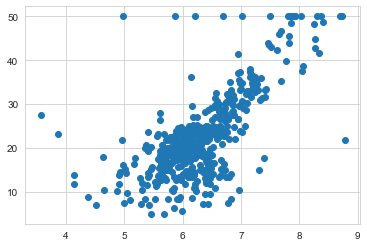

In [25]:
plt.plot(boston_df.RM, boston_df.Price, 'o')

Dokumentasi lebih lengkap untuk step 4: https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb

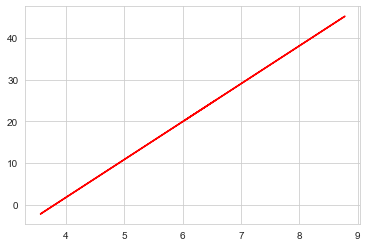

In [26]:
#best fit line
x = boston_df.RM
plt.plot(x, m*x + b, 'r', label='Best Fit Line')

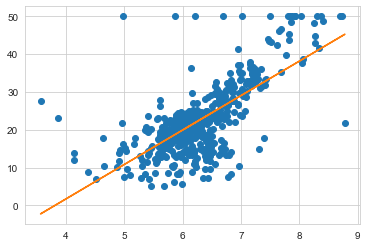

In [27]:
# First the original points, Price vs Avg Number of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x= boston_df.RM
plt.plot(x, m*x + b,label='Best Fit Line')

### Step 5: Getting the Error

Getting error in the best fit line

In [28]:
result = np.linalg.lstsq(X,Y)

#index ke 1 menampilkan error
error_total = result[1]

rmse = np.sqrt(error_total/len(x))

print("The root mean square error was %.2f" %rmse)

The root mean square error was 6.60


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now say that the price of a house won't vary more than 2 times the RMSE 95% of the time. 

Thus we can reasonably expect a house price to be within $13,200 of our line fit (tidak begitu mengerti maksudnya).

Masih belum begitu mengerti

### Step 6: Using scikit learn to implement multivariate regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression

In [30]:
#Create LinearRegression object
lreg = LinearRegression()

In [31]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
#separating boston dataframe into data columns and target columns
#angka 1 artinya adalah axis

#data column
X_multi = boston_df.drop('Price', 1)

#target
Y_target = boston_df.Price

In [33]:
#dataframe tanpa column Price
X_multi.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
#dataframe column Price
Y_target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [35]:
#pass X and Y using linear regression object
#lreg.fit() digunakan untuk fitting linear model 
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Cek the intercept coefficient
print('The intercept coefficient is %.2f' %lreg.intercept_)

The intercept coefficient is 36.46


Apa kegunaan intercept coefficient?
Yang saya dapatkan, coefficient melihat keterhubungan antar target

In [37]:
#Cek the number of coefficient
print('The number of coefficient used was %d' %len(lreg.coef_))

The number of coefficient used was 13


In [38]:
#array dari coefficient
lreg.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

Untuk lebih lengkapnya ada di:
https://nbviewer.jupyter.org/github/jmportilla/Udemy---Machine-Learning/blob/master/Supervised%20Learning%20-%20%20Linear%20Regression.ipynb
Ada pula di linear model dokumentasi: 
https://scikit-learn.org/stable/modules/linear_model.html

In [40]:
#valuenya berupa kolom dari boston_df (?)
coeff_df = DataFrame(boston_df.columns)
# boston_df.columns

In [41]:
coeff_df

,0
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,RAD
9,TAX


In [43]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

#set a new column
coeff_df['Coefficient Estimates'] = pd.Series(lreg.coef_)

coeff_df

,Features,Coefficient Estimates
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Yang paling menghubungkan Price dalam features adalah room (RM). Dilihat dari koefisien yang paling besar. Yang paling berkorelasi adalah Price dan Room

### Step 7: Using Training and Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to validate the model built. Data points in the training set are excluded from the validation set. The correct way to pick out samples from your dataset to be part either the training or validation (also called test) set is randomly.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.



The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter.

In [46]:
#X merupakan dataset dari average room boston_df.RM
#boston_df.Price merupakan harganya

#method cross_validation tidak bisa
#jadi menggunakan model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [47]:
#ambil dataset secara random
#data yang diambil jauh lebih banyak untuk training daripada untuk shape
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


Great! Now that we have our training and testing sets we can continue on to predicint gprices based on the multiple variables.

### Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house prices. We'll use our training set for the prediction and then use our testing set for validation.

In [48]:
lreg = LinearRegression()

In [49]:
#linear regression except only the training dataset
#Apa kegunaan fitting? 
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#predicting the train and test
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [58]:
#Get the mean square error
print('Fit a model X_train, and calculate MSE with Y_train: %.2f' %np.mean((Y_train - pred_train) ** 2))
print('Fit a model X_test, and calculate MSE with X_test and Y_test: %.2f' %np.mean((Y_test - pred_test) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 37.12
Fit a model X_test, and calculate MSE with X_test and Y_test: 64.38


Terlihat cukup jauh berbeda ya. 

### Step 9: Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means your model is not capturing some thing. There could be an interaction between 2 variables that you're not considering, or may be you are measuring time dependent data. If this is the case go back to your model and check your data set closely.

Text(0.5, 1.0, 'Residual Plots')

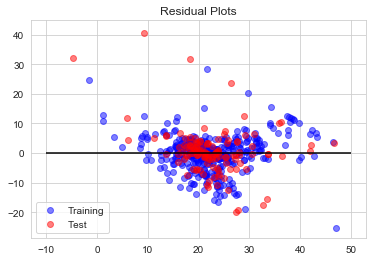

In [56]:
#alpha merupakan blending value, between transparent (0) dan opaque (1)
#X merupakan nilai Y_train dengan Y merupakan residunya

train = plt.scatter(pred_train, (Y_train - pred_train), c='b', alpha=0.5)

test = plt.scatter(pred_test, (Y_test - pred_test), c='r', alpha=0.5)

#plot a horizontal axis lines between -10 sampai dengan 50, dengan Y merupakan 0
plt.hlines(y=0, xmin=-10, xmax=50)

#Labels 
plt.legend((train, test), ('Training', 'Test'), loc='lower left')
plt.title('Residual Plots')

Great! Looks like there aren't any major patterns to be concerned about, overall the majority of the residuals seem to be randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

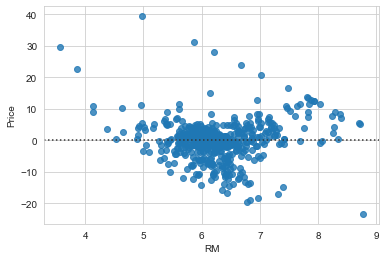

In [57]:
sns.residplot('RM', 'Price', data = boston_df)

#### Rangkuman: 
Sudah cukup mengerti jalannya tutorial. Cuma masih agak bingung kegunaan error (Root MSE dan MSE) untuk apa dan Kenapa saat multivariate regression tidak dilakukan prediksi secara visual?